/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Test accuracy: 0.9717142857142858


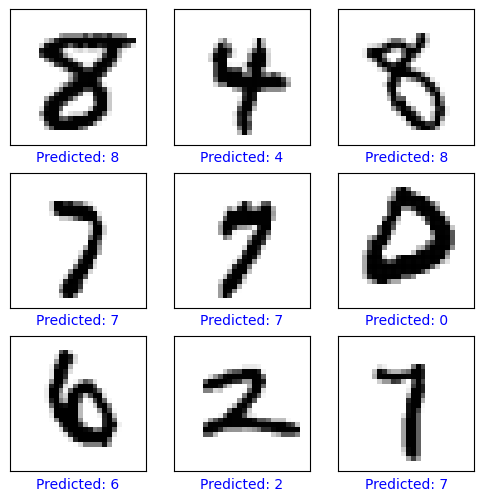

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the neural network model
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest accuracy: {accuracy}')

# Function to plot image and prediction
def plot_image(i, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img_array = np.array(img)  # Convert Series to NumPy array
    plt.imshow(img_array.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {y_pred[i]}", color='blue')
    
# Display sample predictions
num_rows, num_cols = 3, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_test.iloc[i], X_test.iloc[i])
plt.show()


Final Weights: [-0.2  0.2  0.2]


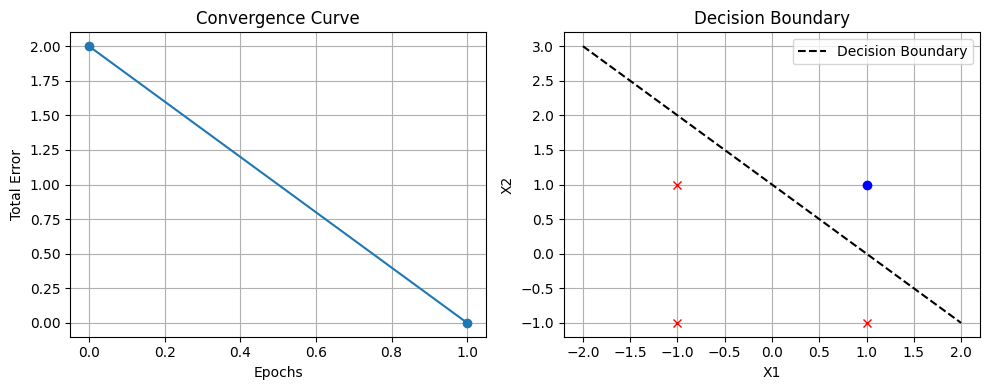

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Bipolar AND function data
X = np.array([[-1, -1],
              [-1,  1],
              [ 1, -1],
              [ 1,  1]])
T = np.array([-1, -1, -1, 1])  # Targets

# Add bias term to inputs
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias as first column

# Parameters
epochs = 20
lr = 0.1  # Learning rate
weights = np.zeros(X_bias.shape[1])  # [bias, w1, w2]

# Activation function
def bipolar_step(x):
    return 1 if x >= 0 else -1

# Training
errors = []
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_bias)):
        net_input = np.dot(weights, X_bias[i])
        output = bipolar_step(net_input)
        error = T[i] - output
        weights += lr * error * X_bias[i]
        total_error += abs(error)
    errors.append(total_error)
    if total_error == 0:
        break

print("Final Weights:", weights)

# Plotting convergence curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(errors, marker='o')
plt.title("Convergence Curve")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.grid(True)

# Plotting decision boundary
plt.subplot(1, 2, 2)
for i in range(len(X)):
    if T[i] == 1:
        plt.plot(X[i][0], X[i][1], 'bo')  # Blue for class +1
    else:
        plt.plot(X[i][0], X[i][1], 'rx')  # Red for class -1

# Decision boundary: w0 + w1*x1 + w2*x2 = 0 → x2 = -(w0 + w1*x1)/w2
x_vals = np.linspace(-2, 2, 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.title("Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Final weights:
 [[-1.34]
 [ 1.34]
 [ 1.34]
 [-1.34]]
Final MSE: 9.4400749121193e-07
Final output:
 [[-1.]
 [ 1.]
 [ 1.]
 [-1.]]


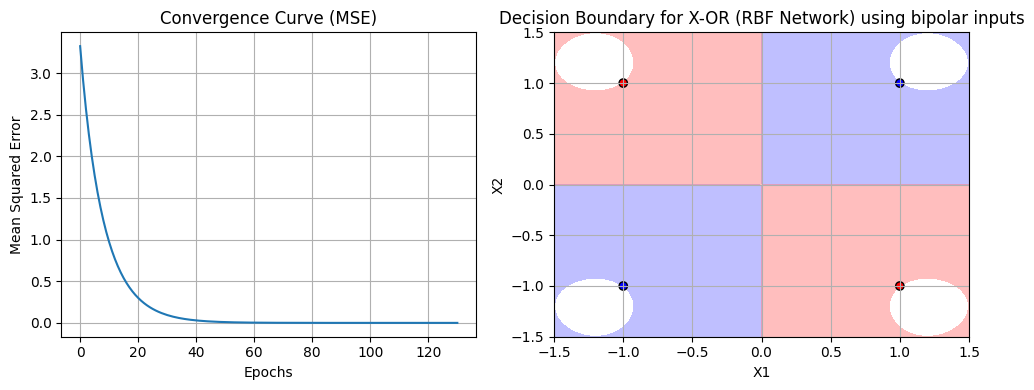

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input data and targets (bipolar X-OR)
X = np.array([[-1, -1],
              [-1,  1],
              [ 1, -1],
              [ 1,  1]])
T = np.array([[-1], [1], [1], [-1]])

# Radial Basis Function
def gaussian_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * sigma ** 2))

# Build RBF layer output for all samples
def compute_rbf_layer(X, centers, sigma):
    G = np.zeros((X.shape[0], len(centers)))
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            G[i, j] = gaussian_rbf(x, c, sigma)
    return G

# Parameters
sigma = 1.0
lr = 0.1
epochs = 500
centers = X.copy()  # Set centers as input points

# Initialize output weights randomly
weights = np.random.randn(len(centers), 1)

# Training loop
mse_list = []
for epoch in range(epochs):
    # Forward pass
    G = compute_rbf_layer(X, centers, sigma)
    output = G @ weights

    # Error and MSE
    error = T - output
    mse = np.mean(error ** 2)
    mse_list.append(mse)

    # Gradient descent update
    weights += lr * G.T @ error

    if mse < 1e-6:
        break

print("Final weights:\n", np.round(weights, 2))
print("Final MSE:", mse)
print("Final output:\n", np.round(output, 2))

# Plot convergence curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title("Convergence Curve (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)

# Plot decision boundary
plt.subplot(1, 2, 2)
x1_vals = np.linspace(-1.5, 1.5, 100)
x2_vals = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
grid = np.c_[xx.ravel(), yy.ravel()]
G_grid = compute_rbf_layer(grid, centers, sigma)
Z = G_grid @ weights
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='bwr', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=T.flatten(), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary for X-OR (RBF Network) using bipolar inputs")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

Final weights:
 [[-0.263]
 [ 0.014]
 [ 0.227]
 [ 0.024]]
Final sigmoid outputs:
 [[0.473]
 [0.488]
 [0.522]
 [0.518]]
Predicted binary outputs:
 [[0]
 [0]
 [1]
 [1]]


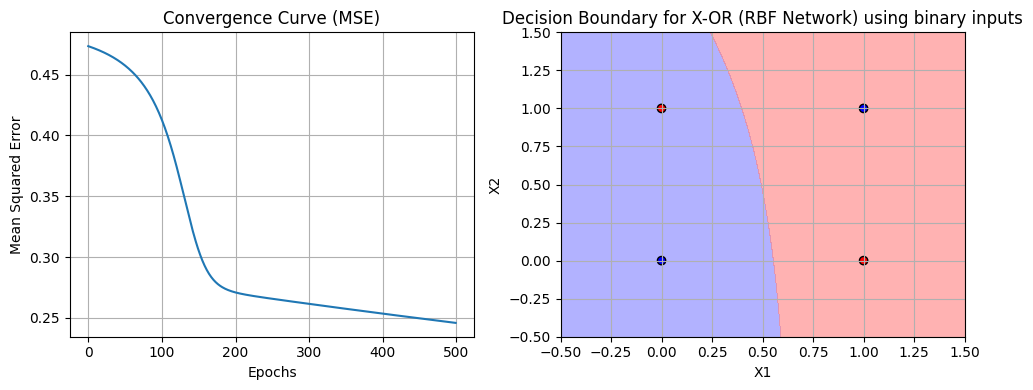

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Input data and binary targets for X-OR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
T = np.array([[0], [1], [1], [0]])

# Radial Basis Function (Gaussian)
def gaussian_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * sigma ** 2))

# Build RBF layer
def compute_rbf_layer(X, centers, sigma):
    G = np.zeros((X.shape[0], len(centers)))
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            G[i, j] = gaussian_rbf(x, c, sigma)
    return G

# Sigmoid activation for output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Parameters
sigma = 1.0
lr = 0.1
epochs = 500
centers = X.copy()  # Use inputs as RBF centers
np.random.seed(0)
weights = np.random.randn(len(centers), 1)  # One weight per RBF neuron

# Training loop
mse_list = []
for epoch in range(epochs):
    G = compute_rbf_layer(X, centers, sigma)
    output = sigmoid(G @ weights)

    error = T - output
    mse = np.mean(error ** 2)
    mse_list.append(mse)

    # Update weights using gradient descent
    gradient = G.T @ (error * output * (1 - output))  # Sigmoid derivative
    weights += lr * gradient

    if mse < 1e-6:
        break

# Predictions
final_output = sigmoid(compute_rbf_layer(X, centers, sigma) @ weights)
predictions = (final_output > 0.5).astype(int)

print("Final weights:\n", np.round(weights, 3))
print("Final sigmoid outputs:\n", np.round(final_output, 3))
print("Predicted binary outputs:\n", predictions)

# Plot convergence curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title("Convergence Curve (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)

# Plot decision boundary
plt.subplot(1, 2, 2)
x1_vals = np.linspace(-0.5, 1.5, 100)
x2_vals = np.linspace(-0.5, 1.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
grid = np.c_[xx.ravel(), yy.ravel()]
G_grid = compute_rbf_layer(grid, centers, sigma)
Z = sigmoid(G_grid @ weights)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-0.1, 0.5, 1.1], cmap='bwr', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=T.flatten(), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary for X-OR (RBF Network) using binary inputs")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

Converged in 3283 epochs.


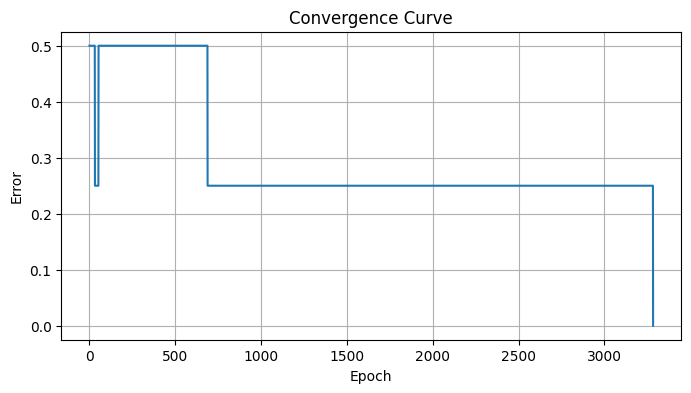

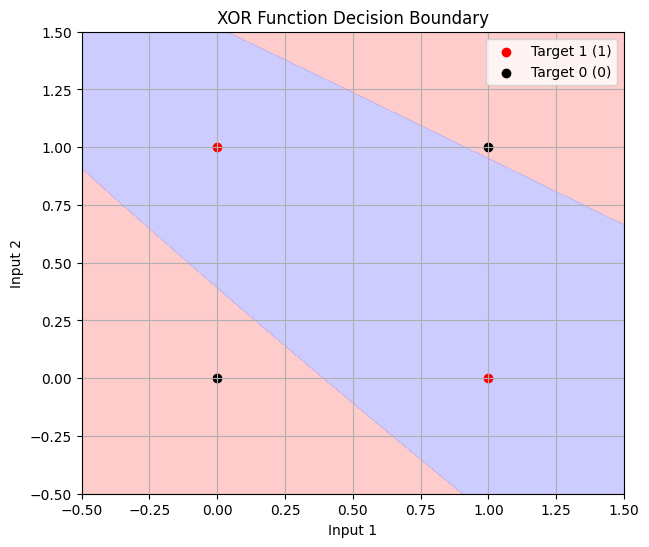

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative (for training)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function dataset
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([0, 1, 1, 0])

# Neural network parameters
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights and biases with random values
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_hidden = np.random.randn(hidden_layer_size)

weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_output = np.random.randn(output_layer_size)

convergence_curve = []

# Training the neural network
for epoch in range(max_epochs):
    misclassified = 0
    for i in range(len(inputs)):
        # Forward pass
        hidden_layer_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        # Backpropagation
        error = targets[i] - predicted_output
        if targets[i] != np.round(predicted_output):
            misclassified += 1

        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        weights_hidden_output += hidden_layer_output[:, np.newaxis] * output_delta * learning_rate
        bias_output += output_delta * learning_rate

        weights_input_hidden += inputs[i][:, np.newaxis] * hidden_delta * learning_rate
        bias_hidden += hidden_delta * learning_rate
        
    err = 1 - (len(inputs) - misclassified) / len(inputs)
    convergence_curve.append(err)

    if misclassified == 0:
        print("Converged in {} epochs.".format(epoch + 1))
        break

# Plot convergence curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Convergence Curve')
plt.grid()
plt.show()

# Create a grid of points to plot decision boundaries
x1 = np.linspace(-0.5, 1.5, 200)
x2 = np.linspace(-0.5, 1.5, 200)
X1, X2 = np.meshgrid(x1, x2)

# Function to predict outputs over the grid
def predict(x1, x2):
    hidden_input = np.dot(np.c_[x1.ravel(), x2.ravel()], weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = sigmoid(output_input)
    return output.reshape(x1.shape)

Z = predict(X1, X2)

# Plot decision boundaries
plt.figure(figsize=(7, 6))
plt.contourf(X1, X2, Z, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'], alpha=0.6)

# Plot data points
plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], label='Target 1 (1)', color='red')
plt.scatter(inputs[targets == 0][:, 0], inputs[targets == 0][:, 1], label='Target 0 (0)', color='black')

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function Decision Boundary')
plt.legend()
plt.grid()
plt.show()

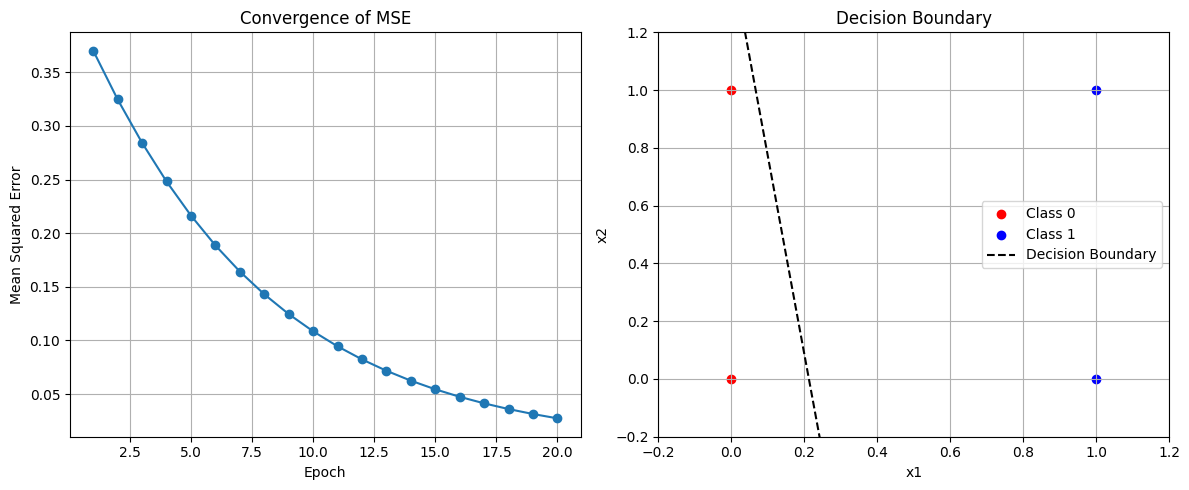

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs and targets
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0],
              [0],
              [1],
              [1]])

# Initialize weights
# W = np.random.randn(3, 1)
W = np.array([[ 1.9189432],
    [ 0.614925],
    [-0.956587]])
# Learning rate and epochs
eta = 0.1
epochs = 20

# For storing MSE
mse_list = []

# Training using SGD and Delta rule
for epoch in range(epochs):
    epoch_error = 0
    for i in range(len(X)):
        x = X[i].reshape(3, 1)
        d = D[i]
        y = np.dot(W.T, x)
        e = d - y
        W += eta * e * x
        epoch_error += e**2
    mse = epoch_error / len(X)
    mse_list.append(mse.item())

# ---- Plotting ----
plt.figure(figsize=(12, 5))

# Plot 1: MSE convergence
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), mse_list, marker='o')
plt.title('Convergence of MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot 2: Decision boundary
plt.subplot(1, 2, 2)
# Extract inputs (ignore bias)
X_no_bias = X[:, :2]

# Separate classes
class_0 = X_no_bias[D[:, 0] == 0]
class_1 = X_no_bias[D[:, 0] == 1]

# Plot data points
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')

# Decision boundary line
# W: [w1, w2, bias], so: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = -(w1*x1 + b)/w2
w1, w2, b = W[0, 0], W[1, 0], W[2, 0]
x_vals = np.array([0, 1])
y_vals = -(w1 * x_vals + b) / w2
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()